<a href="https://colab.research.google.com/github/zhuchangyan/Hello-world/blob/master/Time_dependent_nonlinear_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

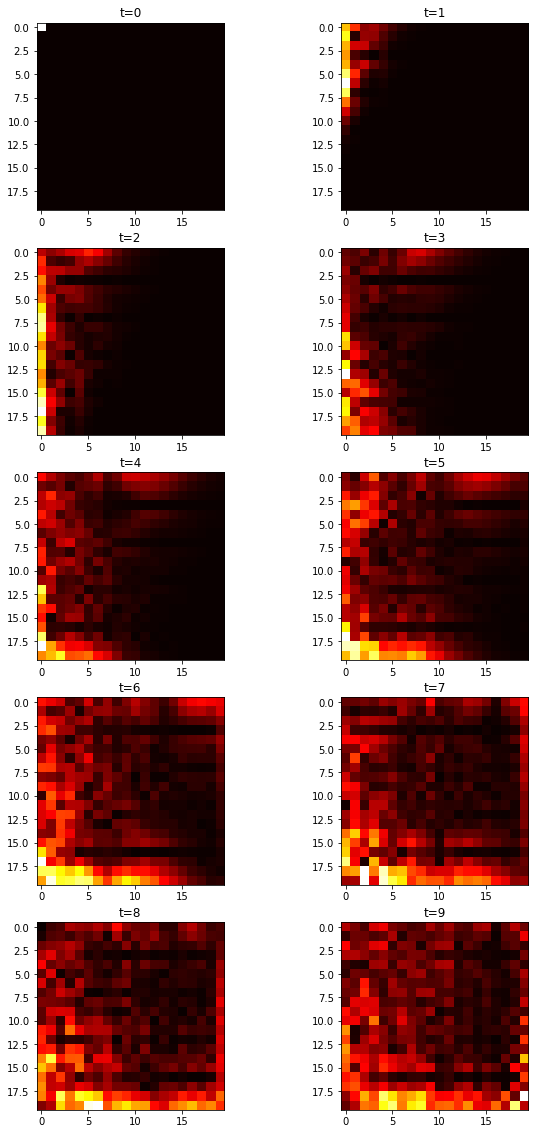

In [32]:

import numpy as np
from scipy.sparse import csc_matrix
import matplotlib.pyplot as plt

from scipy.integrate import solve_ivp

def schrodinger(t,psi,args = H):
    return np.dot(-1j*H,psi)

M=20
N=20

dim = M*N

t=1
t1=1
t2=0.5

p=1
q=2

Hofstadter ={}
move = []

for m in range(M):
    for n in range(N):
        Hofstadter[(m,n)] = n + N*m



# initiate a gussian wave

sigma = 0.1
kX = 1
kY = 1
X = 0
Y = 0
row = []
col = []
val = []

for m in range(M):
    for n in range(N):
        row.append(m)
        col.append(n)
        Guassian = (np.exp (1j*2*np.pi*n) * np.exp(1j*2*np.pi*m)
                   * np.exp(-0.5 * ((m - X) / (sigma))**2)
                   * np.exp(-0.5 * ((n - Y) / (sigma))**2))
        val.append(Guassian)

Initial = csc_matrix((val,(row,col)),(M,N)).toarray() 

psi0 = Initial.flatten()  

A = Initial

move.append(abs(A))

dt = 10

for i in range(10):

  rowi=[]
  coli=[]
  vali=[]

  for m in range(M-1):  #interaction between different rows
      for n in range(N):
          rowi.append(Hofstadter[(m+1,n)])
          coli.append(Hofstadter[(m,n)])
          vali.append(-t1)
          
          rowi.append(Hofstadter[(m,n)])
          coli.append(Hofstadter[(m+1,n)])
          vali.append(-t1)
          
  for m in range(M):  #interaction between different columns
      for n in range(N-1):
          rowi.append(Hofstadter[(m,n+1)])
          coli.append(Hofstadter[(m,n)])
          vali.append(-t2*np.exp(1j*p/q*np.pi*m))
          
          rowi.append(Hofstadter[(m,n)])
          coli.append(Hofstadter[(m,n+1)])
          vali.append(-t2*np.exp(-1j*p/q*np.pi*m))       


  for m in range(M):  #interaction between different rows
      for n in range(N):
          rowi.append(Hofstadter[(m,n)])
          coli.append(Hofstadter[(m,n)])
          vali.append(-t*A[m,n]**2)

          
  H = csc_matrix((vali,(rowi,coli)),(dim,dim)).toarray()  


  #solve the time dependent schrodinger equation


  sol = solve_ivp(schrodinger, [0,dt], psi0, args = H)

  wave = np.abs(sol.y)

  k = sol.y
  psi0 = k[:,dt]

  A = wave[:,dt].reshape(M,N)

  move.append(A)


plt.figure(figsize=(10,20))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.title('t={}'.format(i))
    plt.imshow(move[i],cmap='hot')

